First thing is to import the dataset. As this is a json file, I used pd.read_json() to access it.

# Part 1 ‐ Exploratory Data Analysis

In [1]:
import pandas as pd
login_data = pd.read_json('logins.json')

In [2]:
login_data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


I then created a 'login_counts' columns to account 1 log-in per log-in time:

In [3]:
login_data['login_counts'] = login_data['login_time'].map(login_data['login_time'].value_counts())

In [4]:
login_data.head()

,login_time,login_counts
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


I then grouped the log-ins into 15-minute intervals, as seen below:

In [6]:
pd.DataFrame(login_data.groupby([pd.Grouper(key='login_time', freq='15Min')]).count()).reset_index()


,login_time,login_counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [8]:
new_login_data_15_m = pd.DataFrame(login_data.groupby([pd.Grouper(key='login_time', freq='15Min')]).count()).reset_index()
new_login_data_15_m.head()

,login_time,login_counts
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In order to analyze the data, I extracted the individual time components for further analysis:

In [9]:
new_login_data_15_m['login_time'] = pd.to_datetime(new_login_data_15_m['login_time'])

In [10]:
new_login_data_15_m['year'] = pd.to_datetime(new_login_data_15_m['login_time']).dt.year
new_login_data_15_m['month'] = pd.to_datetime(new_login_data_15_m['login_time']).dt.month
new_login_data_15_m['day'] = pd.to_datetime(new_login_data_15_m['login_time']).dt.day
new_login_data_15_m['hour'] = pd.to_datetime(new_login_data_15_m['login_time']).dt.hour
new_login_data_15_m['week'] = pd.to_datetime(new_login_data_15_m['login_time']).dt.isocalendar().week
new_login_data_15_m['weekday'] = pd.to_datetime(new_login_data_15_m['login_time']).dt.weekday

In [14]:
new_login_data_15_m.head()


,login_time,login_counts,year,month,day,hour,week,weekday
0,1970-01-01 20:00:00,2,1970,1,1,20,1,3
1,1970-01-01 20:15:00,6,1970,1,1,20,1,3
2,1970-01-01 20:30:00,9,1970,1,1,20,1,3
3,1970-01-01 20:45:00,7,1970,1,1,20,1,3
4,1970-01-01 21:00:00,1,1970,1,1,21,1,3


In [15]:
new_login_data_15_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   login_time    9788 non-null   datetime64[ns]
 1   login_counts  9788 non-null   int64         
 2   year          9788 non-null   int64         
 3   month         9788 non-null   int64         
 4   day           9788 non-null   int64         
 5   hour          9788 non-null   int64         
 6   week          9788 non-null   UInt32        
 7   weekday       9788 non-null   int64         
dtypes: UInt32(1), datetime64[ns](1), int64(6)
memory usage: 583.2 KB


I have no null values and am therefore ready to investigate.

In [66]:
new_login_data_15_m.groupby('weekday')['login_counts'].sum()

weekday
0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
Name: login_counts, dtype: int64

Saturday and Sunday are the most common days for log-ins


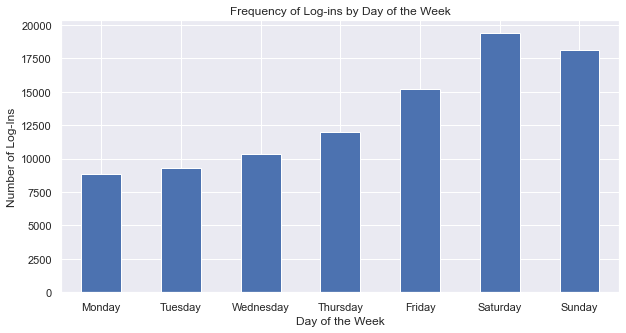

In [106]:

new_login_data_15_m.groupby('weekday')['login_counts'].sum().plot(kind='bar', title='Frequency of Log-ins by Day of the Week', ylabel='Number of Log-Ins',
         xlabel='Day of the Week', figsize=(10, 5))
plt.xticks([0, 1, 2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday'],
       rotation=0)
print('Saturday and Sunday are the most common days for log-ins')

month
1    21239
2    24673
3    33723
4    13507
Name: login_counts, dtype: int64
The most log-ins took place in March


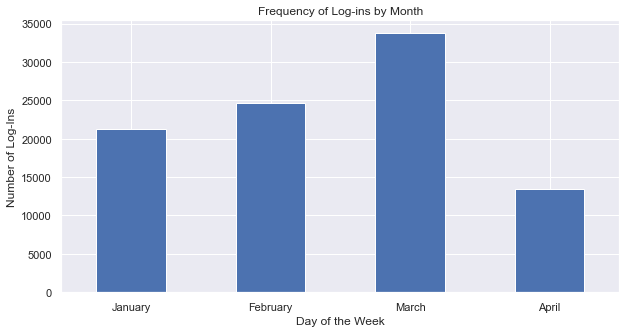

In [110]:
print(new_login_data_15_m.groupby('month')['login_counts'].sum())
new_login_data_15_m.groupby('month')['login_counts'].sum().plot(kind='bar', title='Frequency of Log-ins by Month', ylabel='Number of Log-Ins',
         xlabel='Day of the Week', figsize=(10, 5))
plt.xticks([0, 1, 2,3], ['January', 'February', 'March','April'],
       rotation=0)
print("The most log-ins took place in March")

week
1     2374
2     5217
3     5023
4     4751
5     4744
6     5572
7     5915
8     7035
9     6554
10    7398
11    7338
12    8955
13    7285
14    8095
15    6491
16     395
Name: login_counts, dtype: int64
The most log-ins took place the 12th week of the year


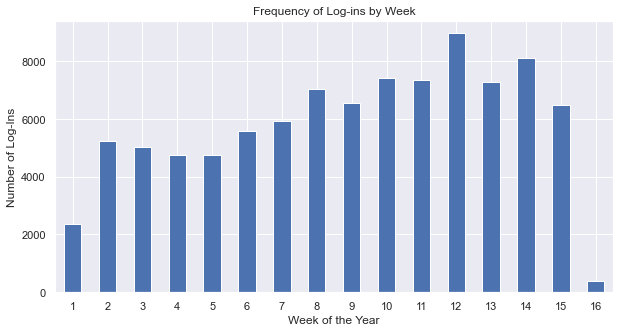

In [116]:
new_login_data_15_m.groupby('week')['login_counts'].sum()
print(new_login_data_15_m.groupby('week')['login_counts'].sum())
new_login_data_15_m.groupby('week')['login_counts'].sum().plot(kind='bar', title='Frequency of Log-ins by Week', ylabel='Number of Log-Ins',
         xlabel='Week of the Year', figsize=(10, 5))
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15],
       rotation=0)
print("The most log-ins took place the 12th week of the year")

In [93]:
login_data

,login_time,login_counts
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1
...,...,...
93137,1970-04-13 18:50:19,1
93138,1970-04-13 18:43:56,1
93139,1970-04-13 18:54:02,1
93140,1970-04-13 18:57:38,1


hour
0     5993
1     6317
2     5800
3     4831
4     5034
5     2945
6     1138
7      815
8      818
9     1527
10    3064
11    5799
12    4964
13    3611
14    3426
15    3038
16    2832
17    2584
18    2980
19    3235
20    4103
21    5623
22    6607
23    6058
Name: login_counts, dtype: int64
The most log-ins took place between 22:00 and 1:00


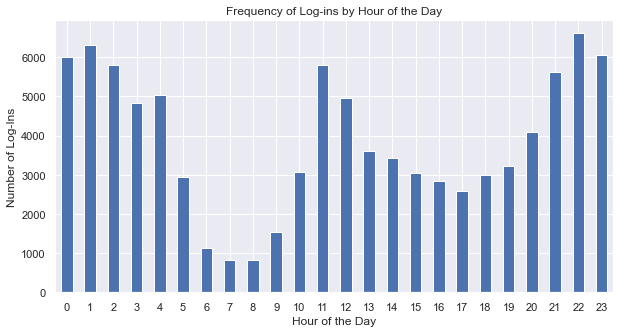

In [119]:
print(new_login_data_15_m.groupby('hour')['login_counts'].sum())
new_login_data_15_m.groupby('hour')['login_counts'].sum().plot(kind='bar', title='Frequency of Log-ins by Hour of the Day', ylabel='Number of Log-Ins',
         xlabel='Hour of the Day', figsize=(10, 5))
plt.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
       rotation=0)
print("The most log-ins took place between 22:00 and 1:00")

# Part 1 Conclusion:
Saturday and Sunday are unsurprisingly responsible for the most log-ins, as this is the weekend. There is a continuous increase in log-ins from Monday to Saturday; Mondays see the fewest log-ins of any weekday.

There is a steady increase in log-ins from January to March before the decrease in April. March marked the highest number of log-ins of the 4 months included in the dataset.

The 12th week of year, also in March, saw the highest log-in rate of the 16 weeks included; the last week from this dataset marked a sharp decline.

The most log-ins took place between 22:00 and 1:00, with a notable spike at 11:00 and 12:00. The fewest log-ins were between 6:00 and 9:00, inclusive.

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric? 

I would choose the amount from the toll reimbursements as the metric; that way, one can see the amount of crossings that take place from one city to the next. Even more specifically, I would measure which crossing receives higher reimbursements to determine which city is receiving (or losing) more visitors.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment:
I will implement the experiment as follows: In addition to measuring the toll reimbursements, I would analyze the times of the day that the different crossings took place (taking into account the circadian rhythm), as well as days of the week, months of the year, and the reimbursement value per crossing: Analyzing traffic volume, seasonality, reimbursement values and time would enable me to find some kind of trend.

b) what statistical test(s) you will conduct to verify the significance of the observation:

I would use a series of significance testing to corroborate such findings.

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats:

I would interpret the results as a way to provide valuable insights for city operations. I would then use visuals (such as PowerPoint, bar graphs etc) to elucidate such findings. That way, if one (or both) cities is lacking in potential visitors, they can figure out ways to incentivize the residents of the opposing city to visit their own city based on my findings.

# Part 3: Predictive Modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.


In [129]:
import pandas as pd
pd.read_json('ultimate_data_challenge.json')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [130]:
df = pd.read_json('ultimate_data_challenge.json')

In [131]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


The columns from this dataset are:

● city: city this user signed up in

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● avg_surge: The average surge multiplier over all of this user’s trips

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● phone: primary device for this user

● surge_pct: the percent of trips taken with surge multiplier > 1

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips


In [134]:
df.info()
print("There are null values in avg_rating_of_driver, phone, and avg_rating_by_driver. Let's fix those:")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
There are null values in avg_rating_of_driver, phone, and avg_rating_by_driver

In [135]:
df['avg_rating_of_driver'].fillna((df['avg_rating_of_driver'].mean()), inplace=True)

In [136]:
df['avg_rating_by_driver'].fillna((df['avg_rating_by_driver'].mean()), inplace=True)

In [137]:
df.dropna(axis=0, inplace=True)

In [138]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [139]:
df = df.reset_index(drop=True)

In [142]:
df.info()
print("There are no more null values; however, we need to conver signup_date and last_trip_date into the proper datetime format.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    49604 non-null  object 
 1   trips_in_first_30_days  49604 non-null  int64  
 2   signup_date             49604 non-null  object 
 3   avg_rating_of_driver    49604 non-null  float64
 4   avg_surge               49604 non-null  float64
 5   last_trip_date          49604 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               49604 non-null  float64
 8   ultimate_black_user     49604 non-null  bool   
 9   weekday_pct             49604 non-null  float64
 10  avg_dist                49604 non-null  float64
 11  avg_rating_by_driver    49604 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
There are no more null values; however, we need to conver signup_date and last

In [143]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

I will convert the ultimate_black_user column such that 1 represents 'True' and 0 represents 'False

In [233]:
df["ultimate_black_user"] = df["ultimate_black_user"].astype(int)

In [234]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_last_active,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,14.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,57.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,175.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,108.0,0


In [222]:
df.groupby('city')['trips_in_first_30_days'].sum()

city
Astapor           31951
King's Landing    24820
Winterfell        56190
Name: trips_in_first_30_days, dtype: int64

city
Astapor           31951
King's Landing    24820
Winterfell        56190
Name: trips_in_first_30_days, dtype: int64

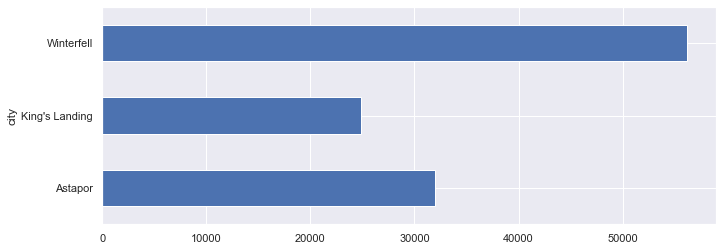

In [224]:
df.groupby('city')['trips_in_first_30_days'].sum().plot.barh()
df.groupby('city')['trips_in_first_30_days'].sum()

In [174]:
df.groupby('phone')['ultimate_black_user'].sum()
print("4822 Android users and 13790 iPhone users are ultimate black users;")
print("10200 Android users and 20792 iPhone users aren't ultimate black users")

4822 Android users and 13790 iPhone users are ultimate black users;
10200 Android users and 20792 iPhone users aren't ultimate black users


phone    ultimate_black_user
Android  False                  10200
         True                    4822
iPhone   False                  20792
         True                   13790
Name: ultimate_black_user, dtype: int64

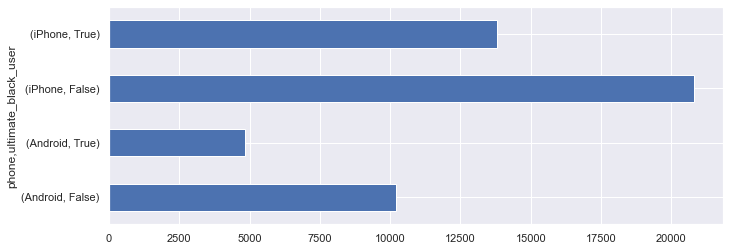

In [169]:
df.groupby('phone')['ultimate_black_user'].value_counts().plot.barh()
df.groupby('phone')['ultimate_black_user'].value_counts()

city            ultimate_black_user
Astapor         False                  10007
                True                    6406
King's Landing  False                   5898
                True                    4168
Winterfell      False                  15087
                True                    8038
Name: ultimate_black_user, dtype: int64

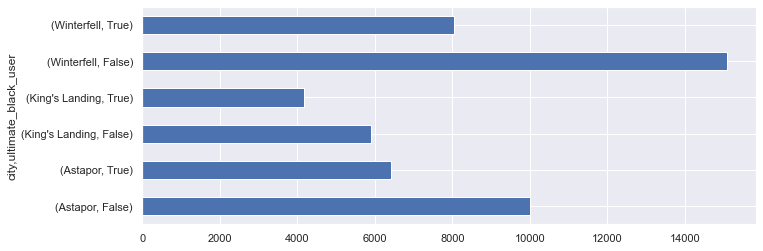

In [167]:
df.groupby('city')['ultimate_black_user'].value_counts().plot.barh()
df.groupby('city')['ultimate_black_user'].value_counts()

city
Astapor           6406
King's Landing    4168
Winterfell        8038
Name: ultimate_black_user, dtype: int64

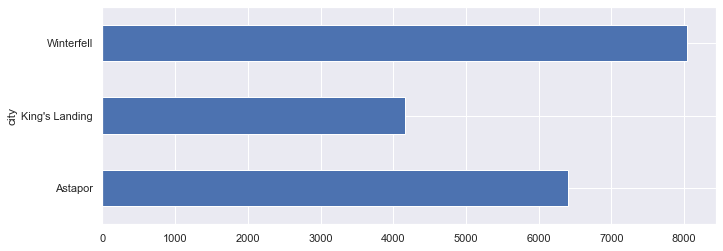

In [172]:
df.groupby('city')['ultimate_black_user'].sum().plot.barh()
df.groupby('city')['ultimate_black_user'].sum()

34,582 people have iPhones, and 15,022 use Androids.


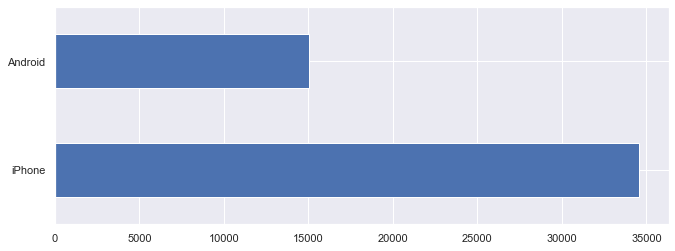

In [185]:
df['phone'].value_counts().plot.barh()
df['phone'].value_counts()
print("34,582 people have iPhones, and 15,022 use Androids.")

city
Astapor           31951
King's Landing    24820
Winterfell        56190
Name: trips_in_first_30_days, dtype: int64

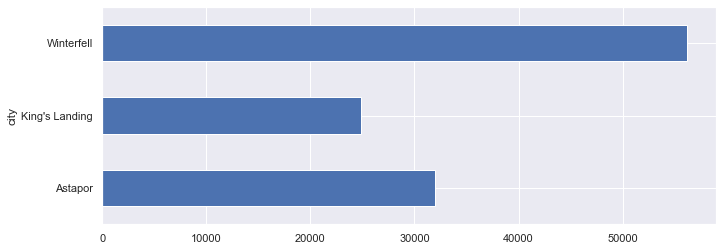

In [188]:
df.groupby('city')['trips_in_first_30_days'].sum().plot.barh()
df.groupby('city')['trips_in_first_30_days'].sum()

In [189]:
df['avg_rating_by_driver'].describe()

count    49604.000000
mean         4.777862
std          0.446220
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [190]:
df.sort_values(by=['last_trip_date'], ascending = False)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6297,King's Landing,0,2014-01-04,3.800000,1.09,2014-07-01,iPhone,11.8,False,64.7,3.51,4.5
9417,Astapor,0,2014-01-19,4.700000,1.38,2014-07-01,iPhone,50.0,False,50.0,5.00,5.0
36745,Winterfell,1,2014-01-05,3.500000,1.36,2014-07-01,iPhone,44.4,True,55.6,5.56,4.9
9365,Astapor,0,2014-01-27,5.000000,1.00,2014-07-01,Android,0.0,False,100.0,1.39,5.0
42027,Winterfell,5,2014-01-28,5.000000,1.00,2014-07-01,iPhone,0.0,False,75.0,6.19,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...
16256,Winterfell,1,2014-01-01,5.000000,1.00,2014-01-01,Android,0.0,True,100.0,2.43,5.0
35894,Winterfell,1,2014-01-01,5.000000,1.00,2014-01-01,iPhone,0.0,False,100.0,6.27,5.0
35336,Winterfell,1,2014-01-01,1.000000,1.00,2014-01-01,iPhone,0.0,True,100.0,17.97,5.0
7094,Astapor,1,2014-01-01,4.601559,1.00,2014-01-01,Android,0.0,True,100.0,12.56,2.0


 What fraction of the observed users were retained?
A retained user is defined as someone who's taken a ride within 30 days of their latest trip. Let's see when the cut-off is:


In [200]:
print(df['last_trip_date'].max())
print("A user is considered active if they've taken a trip within 30 days of July 1, 2014.")

2014-07-01 00:00:00
A user is considered active if they've taken a trip within 30 days of July 1, 2014.


In order to find this, I will create a new column, called days_last_active, indicating the number of days that have passed between the user's most recent ride and July 1, 2014.

In [201]:
days_last_active = df["last_trip_date"].max() - df["last_trip_date"]
df["days_last_active"] = days_last_active

In [211]:
print("I've successfully added the column. However, I must convert this column from a time series to an float64 to perform arithmetic.")
df.head()

I've successfully added the column. However, I must convert this column from a time series to an float64 to perform arithmetic.


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_last_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108.0


In [208]:
import numpy as np
df['days_last_active'] = df['days_last_active'].apply(lambda x: x / np.timedelta64(1,'D'))

In [210]:
print("Column 12 is now a float64.")
df.info()

Column 12 is now a float64.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  days_last_active  

In order to analyze active users, I will create a column where active users, i.e. those who've booked a ride within the last 30 days, are indicated with a 1, and inactive users, i.e. those who've not booked in more than 30 days, are indicated with a 0.

In [212]:
import numpy as np
df['active_user'] = np.where(df['days_last_active']<=30, 1, 0) #created a new column such that 1 indicates an active user, 0 indicates inactive user
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_last_active,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108.0,0


In [229]:
print(round(df['active_user'].sum()*100/df['active_user'].count(),2))

37.64


# 37.64% of the customers have booked a ride within the last 30 days

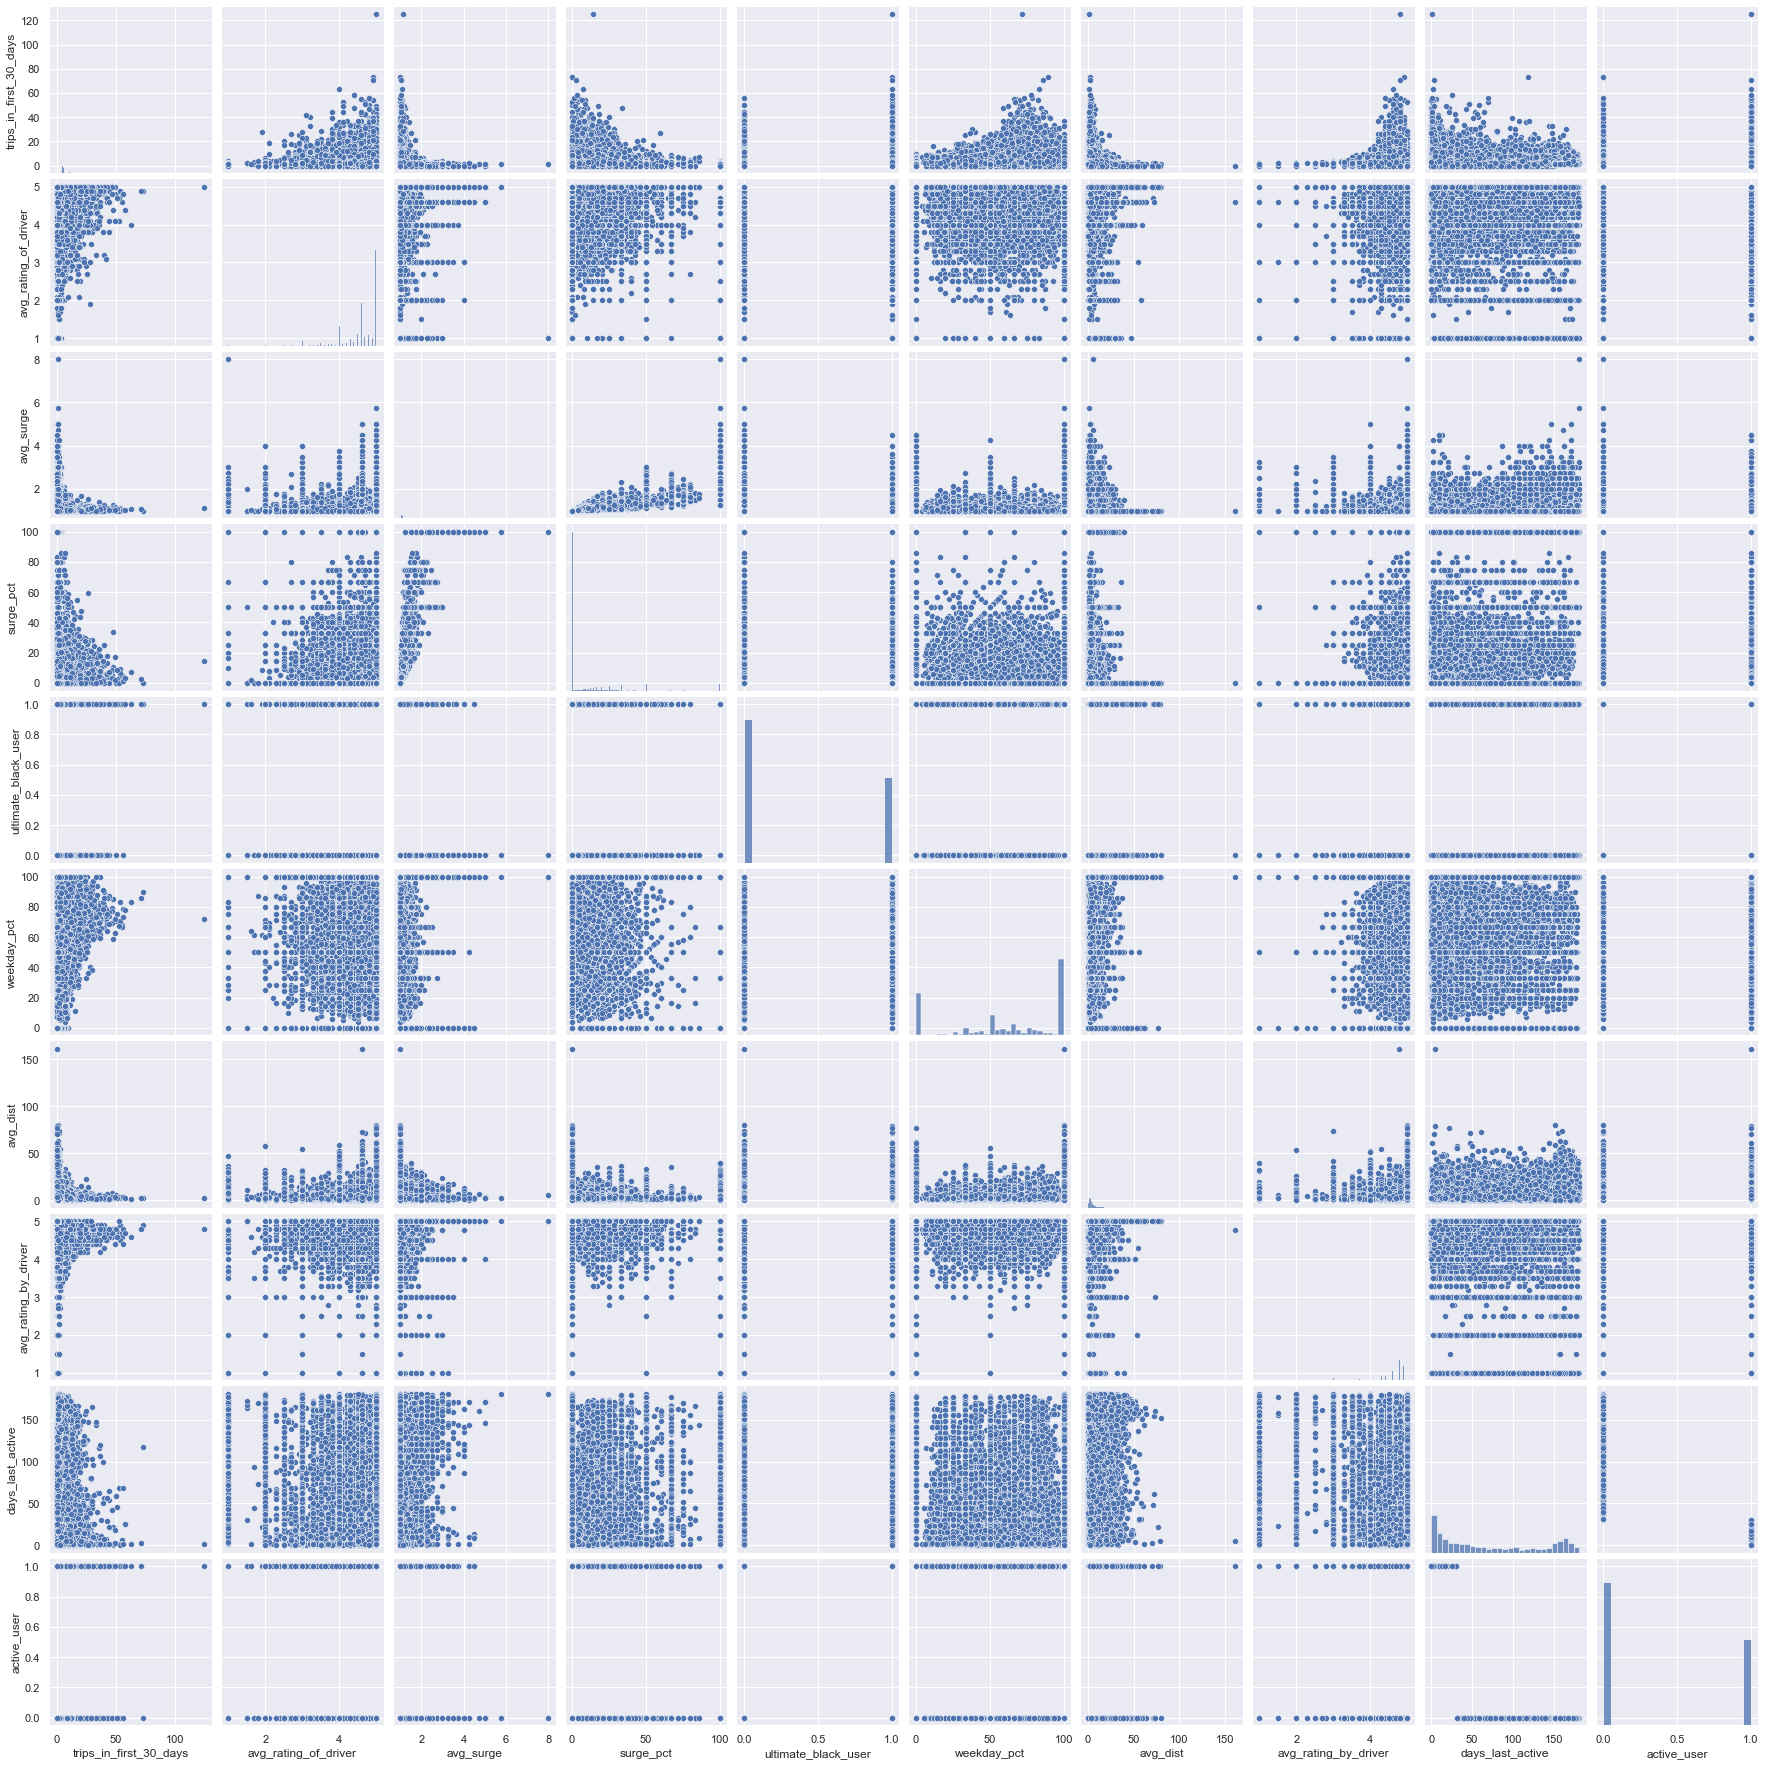

In [236]:
import seaborn as sns
sns.pairplot(df)


<AxesSubplot:>

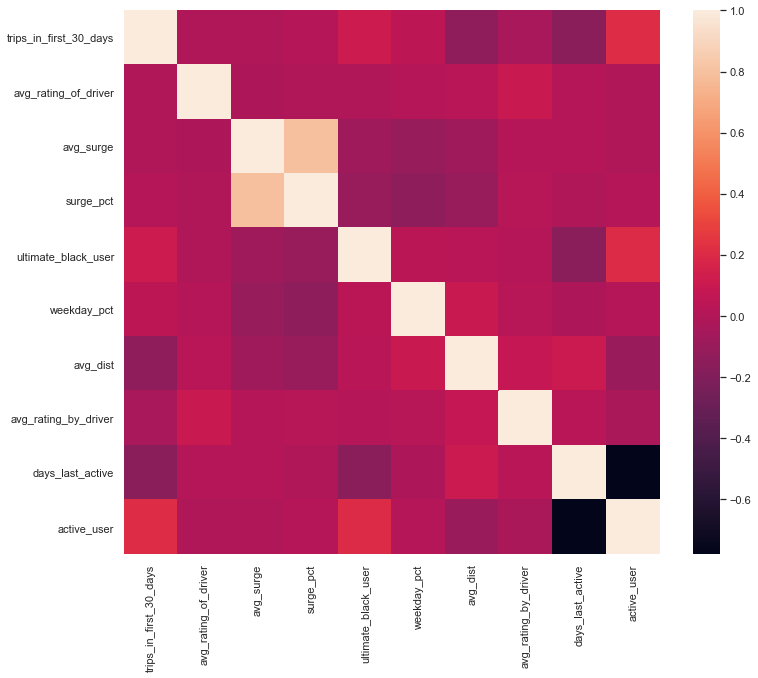

In [235]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49604 entries, 0 to 49603
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  int32         
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  days_last_active        49604 non-null  float6

In order to commence the test/train split, I will convert the city and phone columns into dummy variables, as well as drop the signup_date and last_trip_date columns:

In [238]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_last_active,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,14.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,57.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,175.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,108.0,0


In [239]:
df = pd.get_dummies(df, columns=['city', 'phone'], drop_first=True, dtype=int)

In [240]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_last_active,active_user,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,14.0,1,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,57.0,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,175.0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,2.0,1,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,108.0,0,0,1,0


In [241]:
df.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)


In [242]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_last_active,active_user,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,14.0,1,1,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,57.0,0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,175.0,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,2.0,1,1,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,108.0,0,0,1,0


# Test/Training Split
I will import the necessary packages and then do the test/training split into an 20:80 ratio

In [250]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split


In [251]:
data = df.drop('active_user', axis=1)
labels = df.active_user


X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

X_train = normalize(X_train)
y_train = normalize(y_train)

### The first model I implement is a Logistic Regression:

In [273]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
iris=load_iris()
X=iris.data
Y=iris.target
print("Size of Dataset {}".format(len(X)))
logreg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
logreg.fit(x_train,y_train)
predict=logreg.predict(x_test)
print("Accuracy score on training set is {}".format(accuracy_score(logreg.predict(x_train),y_train)))
print("Accuracy score on test set is {}".format(accuracy_score(predict,y_test)))

Size of Dataset 150
Accuracy score on training set is 0.975
Accuracy score on test set is 1.0


C:\Users\aedge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## I then implemented a Cross Validation:

In [274]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
iris=load_iris()
X=iris.data
Y=iris.target
logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


C:\Users\aedge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aedge\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

## I then wanted to measure the most important feature, i.e. columns from this dataset. There are 13 in total, and I want to find the top 5:

Feature: 0, Score: 37.73911
Feature: 1, Score: 9.09653
Feature: 2, Score: 96.34528
Feature: 3, Score: 37.47138
Feature: 4, Score: 40.20556
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000


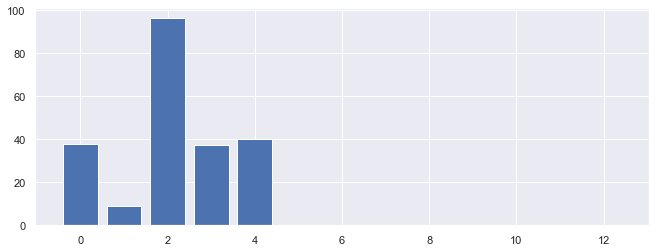

In [280]:

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=13, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [283]:
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'days_last_active', 'active_user',
       'city_King's Landing', 'city_Winterfell', 'phone_iPhone'],
      dtype='object')

In order of importance:

Feature 2, i.e. avg_surge, is the most important rider retention indicator.

Feature 4, ultimate_black_user, is the secondmost important longterm customer indicator.

Feature 3, surge_pct, is the third most important indicator.

Feature 0, the number of trips in the first 30 days of membership, is the fourth most important indicator.

Feature 1, the average rating of the driver, is the fifrth most important rider retention indicator.

I think you can retain consistent rider retention by focusing on these 5 features. Black Users seem to make a notable proportion of clientele; drivers' ratings as well as the number of trips within the first 30 days of membership are also vital indicators of longterm membership.